In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

In [94]:
plt.style.use("cyberpunk")

In [2]:
df = pd.read_csv('../data/total_kickstarter.csv')

In [210]:
df.drop_duplicates(['id'],inplace = True)

## Unique Kickstarter

In [354]:
udf = pd.read_csv('../data/unique_ks.csv')

In [355]:
udf.drop(columns = 'Unnamed: 0',inplace = True)

In [356]:
# udf['creator'] = 
udf['creator'] = udf['creator'].map(lambda x : x.split(':')[2].split(',')[0][1:-1])

In [357]:
udf['result'] = udf['state'].copy()

In [358]:
udf.drop(columns = 'state',inplace = True)

In [359]:
udf = udf.loc[(udf['result']=='successful')|(udf['result']=='failed')].copy()

In [360]:
udf['result'] = udf['result'].map({'successful':1,'failed':0})

In [362]:
unique_creat = []
for k,v in (udf['creator'].value_counts()).items():
    if ' ' in k and v > 1:
        unique_creat.append(k)

In [398]:
for i in udf['creator']:
    udf.loc[udf['creator'] ==i,'attempts']= len(udf.loc[udf['creator']==i]['result'].tolist())
    udf.loc[udf['creator'] ==i,'success']= sum(udf.loc[udf['creator']==i]['result'].tolist())

In [401]:
udf.to_csv('../data/unique_ks_up.csv',index = False)

In [449]:
gb_udf = udf.loc[udf['attempts']>1]

In [434]:
udf.loc[udf['creator']=='"ON!" - Clariden Robotic Team']

,creator,id,name,category,main_category,currency,launched,deadline,pledged,usd_pledged,goal,backers,country,spotlight,staff_pick,result,attempts,success
120596,"""ON!"" - Clariden Robotic Team",45619492,Clariden Robotics 2015 We are in a robotics co...,robots,technology,USD,2015-10-14 14:44:38,2015-11-13 14:44:38,4118.0,4118.0,3000.0,25,US,True,False,1,2,2
143662,"""ON!"" - Clariden Robotic Team",1486975868,Clariden School Rocket Teams The Clariden Scho...,space exploration,technology,USD,2015-04-29 16:19:55,2015-05-29 16:19:55,4732.0,4732.0,4675.0,18,US,True,False,1,2,2


In [494]:
gb_udf[gb_udf['success']> gb_udf['attempts']/2]

,creator,id,name,category,main_category,currency,launched,deadline,pledged,usd_pledged,goal,backers,country,spotlight,staff_pick,result,attempts,success,duration
2,SideKick Lab,662057057,Mars Attacks: Uprising Trading Cards The all-n...,comics,comics,USD,2020-02-03 08:59:31,2020-03-03 23:00:00,169760.00,169760.00,25000.0,526,US,True,True,1,4,4,29
5,Queen Games,399627160,Escape Roll & Write A cooperative game for the...,tabletop games,games,USD,2020-05-20 10:23:48,2020-06-01 10:23:48,93934.50,93934.50,5000.0,1613,US,True,False,1,7,7,12
9,Joseph Oliveira,962366265,STAY AWAKE #1-#3 - A Psychological Horror Comi...,comics,comics,GBP,2020-03-30 05:02:17,2020-04-29 05:02:17,8204.31,10218.47,2400.0,422,GB,True,True,1,8,8,30
11,Spencer Campbell,1571839106,Slayers A tabletop RPG of monster hunting in a...,tabletop games,games,USD,2020-06-30 11:00:05,2020-07-30 11:00:05,17507.00,17507.00,1500.0,807,US,True,False,1,2,2,30
12,Nicholas Williams,792990448,Take 'As I Go Ramblin' Around' To New Heights!...,country & folk,music,USD,2019-03-20 16:14:37,2019-04-19 16:14:37,15634.00,15634.00,15000.0,259,US,True,False,1,4,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175304,Derek,1600191077,Kitty Cat Pet Fountains Kitty Cat Fountains fo...,crafts,crafts,USD,2015-03-03 07:19:47,2015-03-24 07:19:47,382.00,382.00,150.0,9,US,True,False,1,6,4,21
175305,Ben Harris,1706988832,Life has a Soundtrack. Control Yours. GoGlov...,wearables,technology,USD,2014-07-04 00:15:27,2014-08-03 00:15:27,25342.00,25342.00,50000.0,253,US,False,True,0,3,2,30
175315,Wieb,1409012589,CORTAZU: HIGH-QUALITY OUTERWEAR AT A REVOLUTIO...,apparel,fashion,EUR,2018-02-12 11:03:47,2018-03-28 11:03:47,395926.00,484830.89,25000.0,1041,NL,True,False,1,4,4,44
175316,Dennis Lohmann,779408585,paperesk / eye catching papercraft models Buil...,crafts,crafts,EUR,2016-01-15 15:23:37,2016-02-14 15:23:37,5725.00,6228.88,1500.0,334,DE,True,True,1,2,2,30


In [488]:
gb_udf['launched'] = gb_udf['launched'].map(lambda x : pd.to_datetime(x)).copy()
gb_udf['deadline'] = gb_udf['deadline'].map(lambda x : pd.to_datetime(x)).copy()

/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [487]:
gb_udf['duration'] = (gb_udf['deadline'] - gb_udf['launched']).dt.days

/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


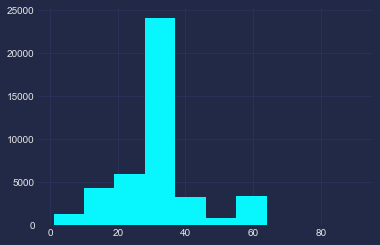

In [492]:
gb_udf['duration'].hist()

## visaualizations

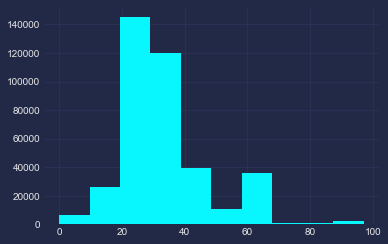

In [211]:
df['duration'].hist();

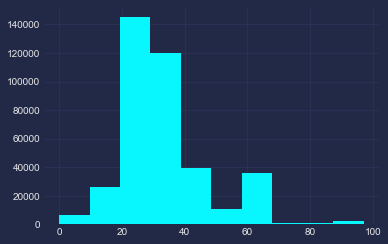

In [212]:
plt.hist(x = df['duration'],bins = 10,);

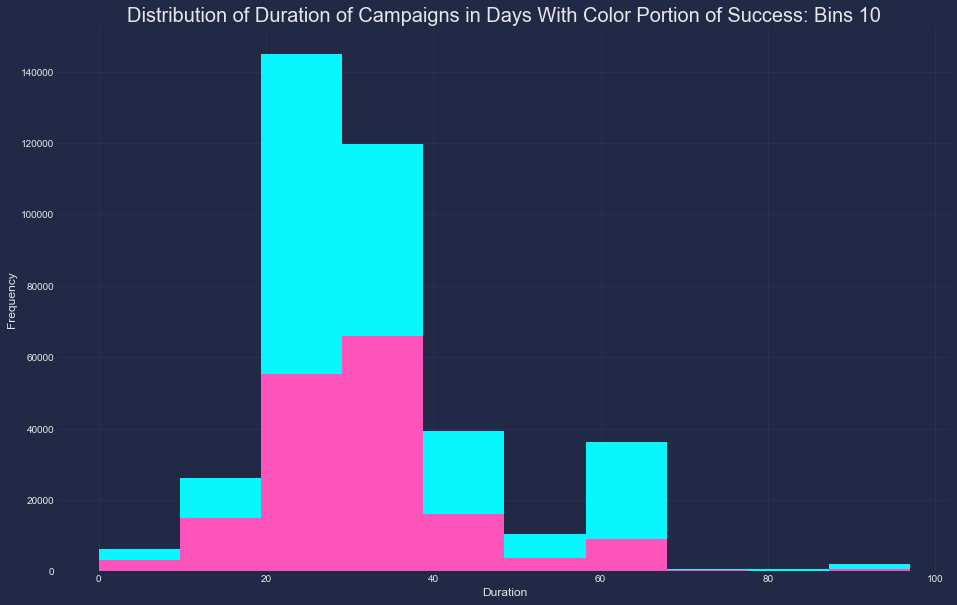

In [213]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'])
plt.hist(df.loc[df['result']==1]['duration'])
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 10',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

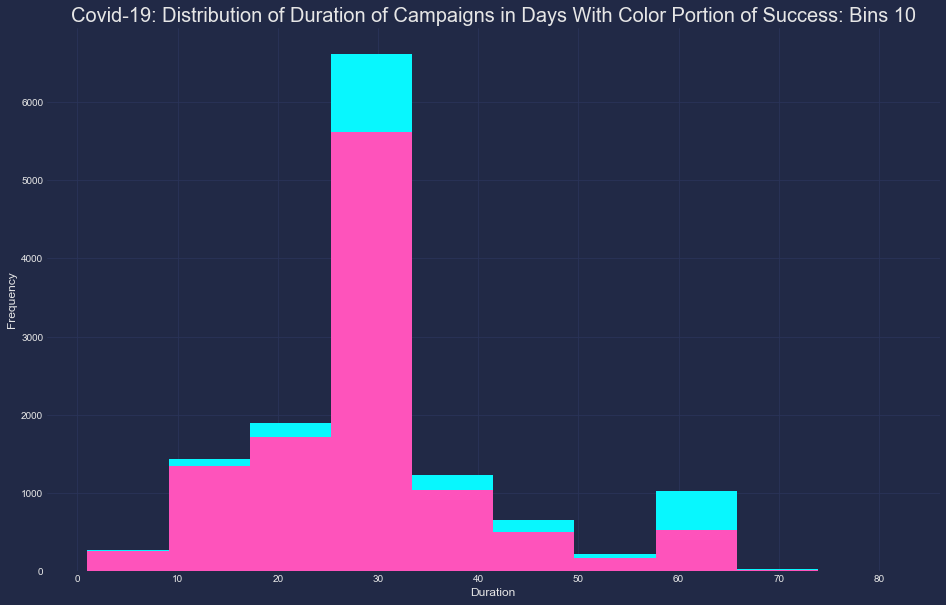

In [214]:
plt.figure(figsize = (16,10))
plt.hist(df_cov['duration'])
plt.hist(df_cov.loc[df_cov['result']==1]['duration'])
plt.title('Covid-19: Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 10',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

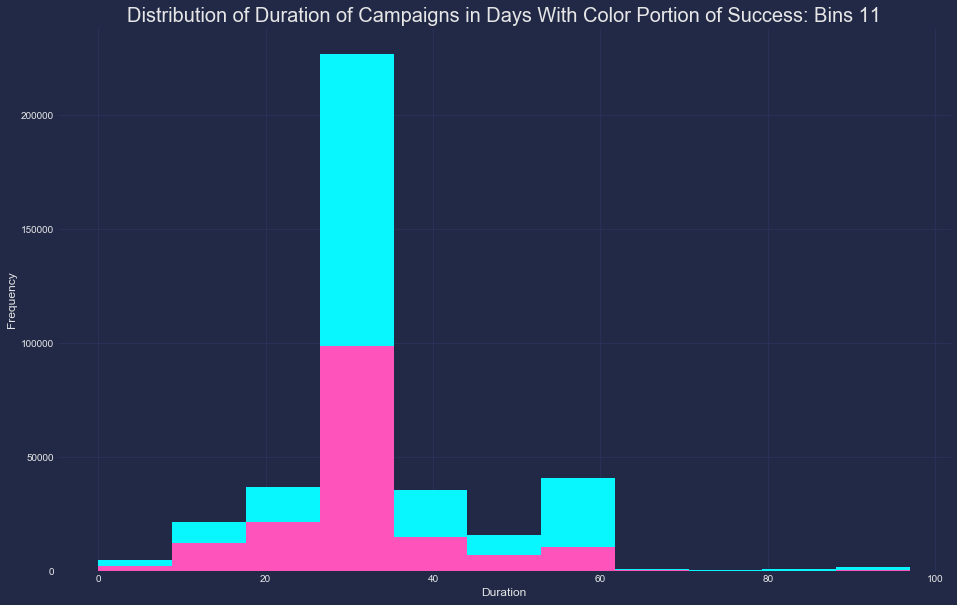

In [215]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'],bins = 11)
plt.hist(df.loc[df['result']==1]['duration'],bins = 11)
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 11',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

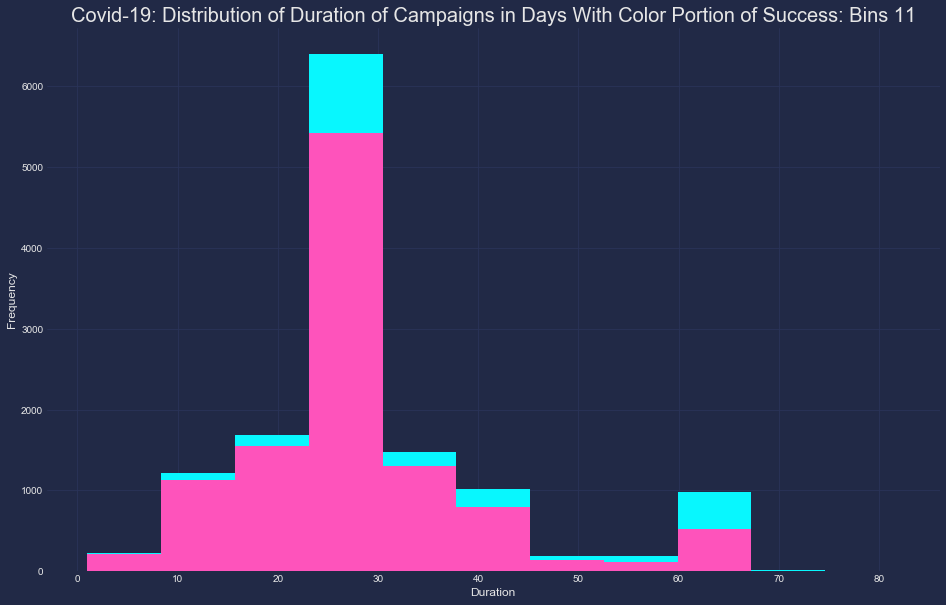

In [216]:
plt.figure(figsize = (16,10))
plt.hist(df_cov['duration'],bins = 11)
plt.hist(df_cov.loc[df_cov['result']==1]['duration'],bins = 11)
plt.title('Covid-19: Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 11',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

In [217]:
sns.distplot(, kde = False)

SyntaxError: invalid syntax (<ipython-input-217-9aefdd010f68>, line 1)

In [218]:
df['main_category'].value_counts().keys()

Index(['film & video', 'music', 'publishing', 'games', 'technology', 'art',
       'design', 'food', 'fashion', 'comics', 'theater', 'photography',
       'crafts', 'journalism', 'dance'],
      dtype='object')

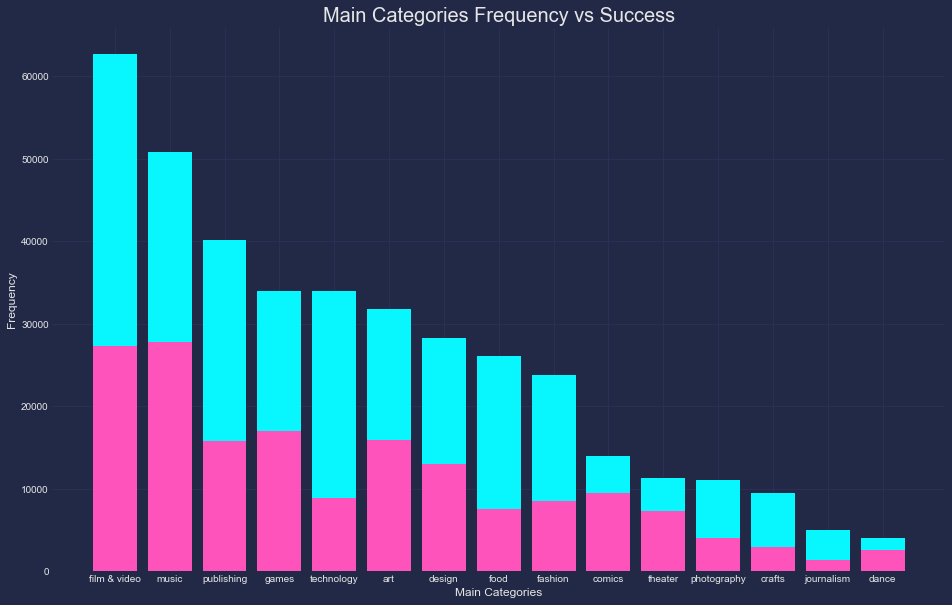

In [219]:
plt.figure(figsize = (16,10))
plt.bar(x = df['main_category'].value_counts().keys(), height = df['main_category'].value_counts())
plt.bar(x = df.loc[df['result']==1]['main_category'].value_counts().keys(), height = df.loc[df['result']==1]['main_category'].value_counts())
plt.xlabel('Main Categories', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Main Categories Frequency vs Success', fontsize = 20)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

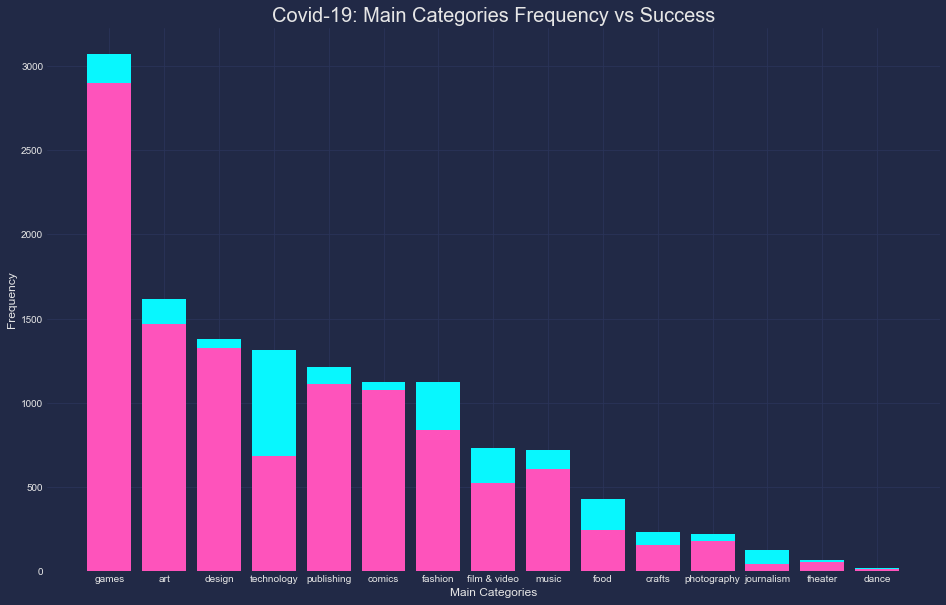

In [220]:
plt.figure(figsize = (16,10))
plt.bar(x = df_cov['main_category'].value_counts().keys(), height = df_cov['main_category'].value_counts())
plt.bar(x = df_cov.loc[df_cov['result']==1]['main_category'].value_counts().keys(), height = df_cov.loc[df_cov['result']==1]['main_category'].value_counts())
plt.xlabel('Main Categories', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Covid-19: Main Categories Frequency vs Success', fontsize = 20)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

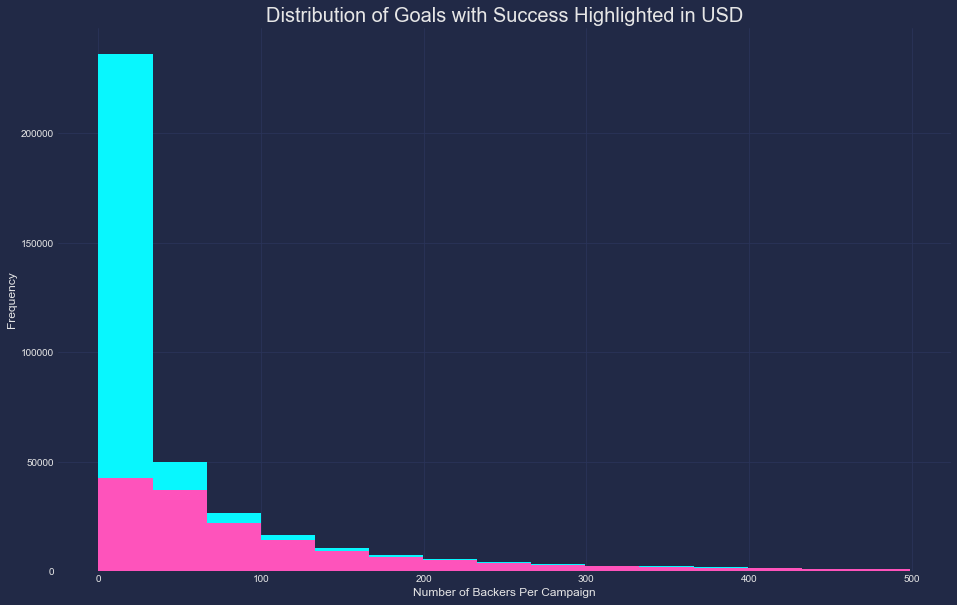

In [221]:
plt.figure(figsize = (16,10))
df.loc[(df['backers'] < 500)]['backers'].hist(bins = 15)
df.loc[(df['backers']<500) & (df['result']==1)]['backers'].hist(bins = 15)
plt.xlabel('Number of Backers Per Campaign',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Goals with Success Highlighted in USD',fontsize = 20)
# mplcyberpunk.add_glow_effects()
plt.tight_layout;

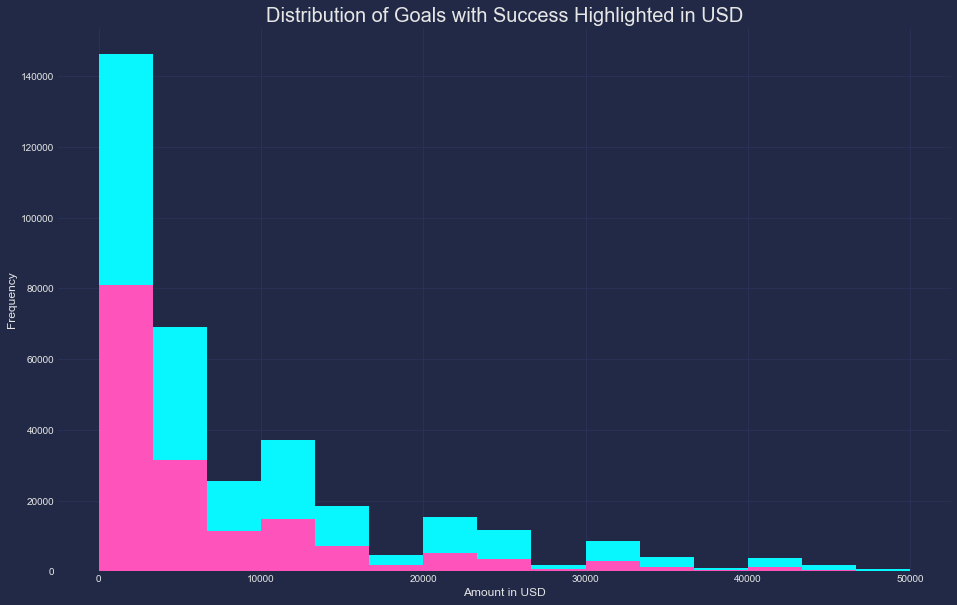

In [222]:
plt.figure(figsize = (16,10))

df[df['goal']<50000]['goal'].hist(bins = 15)
df[(df['goal']<50000)&(df['result']==1)]['goal'].hist(bins = 15)
plt.xlabel('Amount in USD',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Goals with Success Highlighted in USD',fontsize = 20)
# mplcyberpunk.add_glow_effects()
plt.tight_layout;

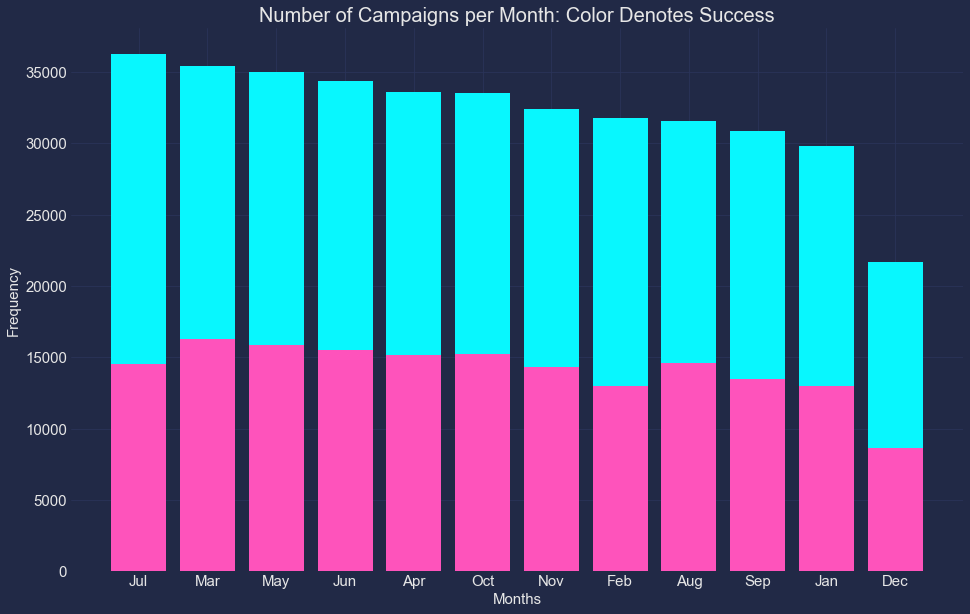

In [223]:
plt.figure(figsize = (16,10))
plt.bar(x = df['month_launched'].value_counts().keys(), height = df['month_launched'].value_counts())
plt.bar(x = df.loc[df['result']==1]['month_launched'].value_counts().keys(), height = df.loc[df['result']==1]['month_launched'].value_counts())
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Campaigns per Month: Color Denotes Success', fontsize = 20)
plt.xticks(np.arange(12), (['Jul','Mar','May','Jun','Apr','Oct','Nov','Feb','Aug','Sep','Jan','Dec']),fontsize = 15)
plt.yticks(fontsize = 15)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [146]:
df['launched'] = df['launched'].map(lambda x : pd.to_datetime(x))
df['deadline'] = df['deadline'].map(lambda x : pd.to_datetime(x))

In [177]:
df_cov = df.loc[(df['launched'].dt.year == 2020) & (df['launched'].dt.month.isin([3,4,5,6,7]))]

In [178]:
df_cov['result'].value_counts(normalize = True)

1    0.837244
0    0.162756
Name: result, dtype: float64

In [180]:
df['result'].value_counts(normalize = True)

0    0.53534
1    0.46466
Name: result, dtype: float64

In [183]:
df_cov.loc[df_cov['result']==1]['main_category'].value_counts().keys()

Index(['games', 'art', 'design', 'publishing', 'comics', 'fashion',
       'technology', 'music', 'film & video', 'food', 'photography', 'crafts',
       'theater', 'journalism', 'dance'],
      dtype='object')

In [184]:
df_cov.loc[df_cov['result']==1]['main_category'].value_counts()

games           2896
art             1465
design          1324
publishing      1111
comics          1074
fashion          838
technology       685
music            607
film & video     521
food             242
photography      180
crafts           154
theater           54
journalism        42
dance             11
Name: main_category, dtype: int64

In [186]:
df_cov.loc[df_cov['result']==0]['main_category'].value_counts()

technology      630
fashion         283
film & video    209
food            184
games           177
art             153
music           111
publishing      104
journalism       82
crafts           81
design           52
comics           52
photography      43
theater          11
dance             6
Name: main_category, dtype: int64

In [188]:
2896/(177 + 2896)

0.9424015619915392

In [192]:
for k,v in df['main_category'].value_counts().items():
    print(k,v)

film & video 64495
music 52907
publishing 41076
games 36257
technology 35793
art 33139
design 29503
food 28146
fashion 26264
comics 15831
theater 13380
photography 13126
crafts 10822
journalism 6639
dance 5296


In [206]:
cat_success = {}
for k,v in df.loc[df['result']==1]['main_category'].value_counts().items():
    cat_success[k] = v
    

In [205]:
cate = {}
for k,v in df['main_category'].value_counts().items():
    cate[k] = v

In [207]:
cat_success

{'music': 29617,
 'film & video': 28412,
 'games': 18694,
 'art': 17052,
 'publishing': 16764,
 'design': 14231,
 'comics': 11277,
 'fashion': 10688,
 'technology': 10557,
 'theater': 9404,
 'food': 9259,
 'photography': 5873,
 'crafts': 4128,
 'dance': 3727,
 'journalism': 2070}

In [208]:
cate

{'film & video': 64495,
 'music': 52907,
 'publishing': 41076,
 'games': 36257,
 'technology': 35793,
 'art': 33139,
 'design': 29503,
 'food': 28146,
 'fashion': 26264,
 'comics': 15831,
 'theater': 13380,
 'photography': 13126,
 'crafts': 10822,
 'journalism': 6639,
 'dance': 5296}

In [ ]:
for k_s,v_s in cat_success:
    for k_c,v_c in cate:
        if k_s == k_c:
            cat_success[k_s]/